# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

In [2]:
bus = pd.read_csv('df_seoul_bus_station.csv')
move = pd.read_csv('df_seoul_moving.csv')

In [77]:
o_bus1 = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")
o_bus2 = pd.read_csv('1.1 bus_station.csv', sep=",", encoding = "UTF-8")
o_move = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [78]:
move.rename(columns={'도착':'자치구'}, inplace=True)

In [79]:
standard = pd.merge(bus, move, on='자치구')
standard

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.284573,83.309306,12904380,46170267.40
1,강동구,369,21,2890053,2830506,99.161194,97.118065,26.108477,59.889404,9596980,22014206.89
2,강북구,413,67,4825181,4671783,133.020373,128.791504,24.282441,36.281421,8765160,13096395.71
3,강서구,566,49,4681083,4652828,88.119480,87.587591,25.496986,54.208682,10718780,22789004.72
4,관악구,466,86,7655819,7792476,154.753674,157.516040,23.842468,46.586809,10091730,19718658.80
5,광진구,269,41,2749448,2753411,118.352546,118.523137,22.779081,43.712430,9761770,18732568.44
6,구로구,486,79,4942197,4730992,119.235615,114.140076,23.480408,38.895596,9072360,15028480.32
7,금천구,345,58,3776658,3581930,123.098370,116.751304,24.394485,28.730583,7190250,8468310.47
8,노원구,514,57,4353295,4292724,88.476211,87.245168,24.497542,51.091182,10256190,21389936.36
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.102882,35.099543,8053130,11260109.02


In [80]:
# 유동인구 데이터 전처리
o_move.replace("*","2", inplace=True)
o_move = o_move.astype({'이동인구(합)':'float'})

o_move['출발'] = o_move['출발 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

o_move['도착'] = o_move['도착 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

o_move.info(), o_move.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
 10  출발           object 
 11  도착           object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.8+ GB


(None, (28923054, 12))

In [104]:
o_move = o_move.loc[(o_move['출발 시군구 코드'] < 20000) & (o_move['도착 시군구 코드'] < 20000)]
o_move_sum1 = o_move.groupby(by=['출발', '도착'], as_index=False)['이동인구(합)'].sum()
o_move_sum1.rename(columns={'이동인구(합)' : '총 이동인구'}, inplace=True)
o_move_sum2 = o_move.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].sum()
o_move_sum2.rename(columns={'평균 이동 시간(분)' : '총 이동 시간'}, inplace=True)
o_move_mean1 = o_move.groupby(by=['출발', '도착'], as_index=False)['이동인구(합)'].mean()
o_move_mean2 = o_move.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].mean()
o_move_count = o_move.groupby(by=['출발', '도착'], as_index=False)['평균 이동 시간(분)'].count()
o_move_count.rename(columns={'평균 이동 시간(분)' : '빈도'}, inplace=True)

In [105]:
o_move_sum1

,출발,도착,총 이동인구
0,강남구,강남구,24645635.26
1,강남구,강동구,887641.96
2,강남구,강북구,255581.36
3,강남구,강서구,468843.27
4,강남구,관악구,1153663.97
...,...,...,...
620,중랑구,용산구,109326.21
621,중랑구,은평구,45210.57
622,중랑구,종로구,258428.59
623,중랑구,중구,270464.77


In [106]:
o_move_sum2

,출발,도착,총 이동 시간
0,강남구,강남구,603670
1,강남구,강동구,616490
2,강남구,강북구,489030
3,강남구,강서구,581830
4,강남구,관악구,608100
...,...,...,...
620,중랑구,용산구,286250
621,중랑구,은평구,228080
622,중랑구,종로구,350540
623,중랑구,중구,380020


In [107]:
o_move_mean1

,출발,도착,이동인구(합)
0,강남구,강남구,525.728690
1,강남구,강동구,35.747330
2,강남구,강북구,16.423426
3,강남구,강서구,24.571211
4,강남구,관악구,46.157637
...,...,...,...
620,중랑구,용산구,10.997506
621,중랑구,은평구,6.384772
622,중랑구,종로구,18.717215
623,중랑구,중구,18.523715


In [108]:
o_move_mean2

,출발,도착,평균 이동 시간(분)
0,강남구,강남구,12.877194
1,강남구,강동구,24.827433
2,강남구,강북구,31.424624
3,강남구,강서구,30.492637
4,강남구,관악구,24.329839
...,...,...,...
620,중랑구,용산구,28.794890
621,중랑구,은평구,32.210140
622,중랑구,종로구,25.388571
623,중랑구,중구,26.026984


In [109]:
o_move_count

,출발,도착,빈도
0,강남구,강남구,46879
1,강남구,강동구,24831
2,강남구,강북구,15562
3,강남구,강서구,19081
4,강남구,관악구,24994
...,...,...,...
620,중랑구,용산구,9941
621,중랑구,은평구,7081
622,중랑구,종로구,13807
623,중랑구,중구,14601


In [110]:
o_move_sum = pd.merge(o_move_sum1, o_move_sum2, on=['출발', '도착'])
o_move_mean = pd.merge(o_move_mean1, o_move_mean2, on=['출발', '도착'])
tmp = pd.merge(o_move_sum, o_move_mean, on=['출발', '도착'])
o_move_m = pd.merge(tmp, o_move_count, on=['출발', '도착'])
o_move_m

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879
1,강남구,강동구,887641.96,616490,35.747330,24.827433,24831
2,강남구,강북구,255581.36,489030,16.423426,31.424624,15562
3,강남구,강서구,468843.27,581830,24.571211,30.492637,19081
4,강남구,관악구,1153663.97,608100,46.157637,24.329839,24994
...,...,...,...,...,...,...,...
620,중랑구,용산구,109326.21,286250,10.997506,28.794890,9941
621,중랑구,은평구,45210.57,228080,6.384772,32.210140,7081
622,중랑구,종로구,258428.59,350540,18.717215,25.388571,13807
623,중랑구,중구,270464.77,380020,18.523715,26.026984,14601


In [113]:
o_move_m.sort_values(by='빈도', ascending=False)
o_move_m['총이동인구/빈도'] = o_move_m['총 이동인구'] / o_move_m['빈도']
o_move_m['총이동시간/빈도'] = o_move_m['총 이동 시간'] / o_move_m['빈도']


,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879,525.728690,12.877194
1,강남구,강동구,887641.96,616490,35.747330,24.827433,24831,35.747330,24.827433
2,강남구,강북구,255581.36,489030,16.423426,31.424624,15562,16.423426,31.424624
3,강남구,강서구,468843.27,581830,24.571211,30.492637,19081,24.571211,30.492637
4,강남구,관악구,1153663.97,608100,46.157637,24.329839,24994,46.157637,24.329839
...,...,...,...,...,...,...,...,...,...
620,중랑구,용산구,109326.21,286250,10.997506,28.794890,9941,10.997506,28.794890
621,중랑구,은평구,45210.57,228080,6.384772,32.210140,7081,6.384772,32.210140
622,중랑구,종로구,258428.59,350540,18.717215,25.388571,13807,18.717215,25.388571
623,중랑구,중구,270464.77,380020,18.523715,26.026984,14601,18.523715,26.026984


In [114]:
o_move_m.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
0,강남구,강남구,24645635.26,603670,525.728690,12.877194,46879,525.728690,12.877194
442,송파구,송파구,23308262.68,638050,498.946006,13.658354,46715,498.946006,13.658354
26,강동구,강동구,15002675.88,669180,319.178706,14.236661,47004,319.178706,14.236661
364,서초구,서초구,14431981.86,606490,313.731916,13.184279,46001,313.731916,13.184279
78,강서구,강서구,14318815.49,641980,308.888073,13.848908,46356,308.888073,13.848908
...,...,...,...,...,...,...,...,...,...
452,양천구,강북구,24053.72,147010,5.714830,34.927536,4209,5.714830,34.927536
459,양천구,도봉구,17740.78,123960,5.335573,37.281203,3325,5.335573,37.281203
618,중랑구,양천구,24349.95,164770,5.293467,35.819565,4600,5.293467,35.819565
243,도봉구,양천구,17229.90,119720,5.280386,36.690162,3263,5.280386,36.690162


In [115]:
tmp = o_move_m.loc[o_move_m['출발'] != o_move_m['도착']]
tmp.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
350,서초구,강남구,4802309.66,594630,124.473437,15.412509,38581,124.473437,15.412509
14,강남구,서초구,4814578.33,608310,124.404494,15.718198,38701,124.404494,15.718198
425,송파구,강남구,3314641.58,654700,93.673635,18.502190,35385,93.673635,18.502190
17,강남구,송파구,3326366.66,676720,93.269590,18.974877,35664,93.269590,18.974877
42,강동구,송파구,2640613.78,658870,73.830280,18.421685,35766,73.830280,18.421685
...,...,...,...,...,...,...,...,...,...
452,양천구,강북구,24053.72,147010,5.714830,34.927536,4209,5.714830,34.927536
459,양천구,도봉구,17740.78,123960,5.335573,37.281203,3325,5.335573,37.281203
618,중랑구,양천구,24349.95,164770,5.293467,35.819565,4600,5.293467,35.819565
243,도봉구,양천구,17229.90,119720,5.280386,36.690162,3263,5.280386,36.690162


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 정류장과 노선 수 대비 이용자

* 가설 2 이동시간 대비 이용자

* 가설 3 두 지역구 간의 이동 빈도 대비 이용

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [8]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')
 

### 1) describe

In [9]:
standard.describe()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
count,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,424.600000,72.920000,4.912037e+06,4.800701e+06,115.718291,113.031529,23.333424,46.482729,9.899610e+06,2.023407e+07
std,106.279506,23.808122,1.421263e+06,1.400538e+06,17.080840,16.865744,1.433409,12.784108,1.212112e+06,7.922868e+06
min,178.000000,21.000000,2.749448e+06,2.746738e+06,87.403863,86.214261,21.166269,28.730583,7.190250e+06,8.468310e+06
25%,349.000000,56.000000,3.792541e+06,3.740923e+06,103.907639,101.235343,22.215130,38.417589,9.222310e+06,1.567551e+07
50%,435.000000,71.000000,4.942197e+06,4.730992e+06,119.235615,115.324511,23.233772,42.648641,9.952210e+06,1.873257e+07
75%,499.000000,94.000000,5.641742e+06,5.603488e+06,126.687777,122.418028,24.394485,51.123170,1.031412e+07,2.201421e+07
max,602.000000,107.000000,8.030483e+06,7.792476e+06,154.753674,157.516040,26.108477,83.309306,1.290438e+07,4.617027e+07


### 2) info

In [10]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   정류장수         25 non-null     int64  
 2   노선수          25 non-null     int64  
 3   승차총승객수       25 non-null     int64  
 4   하차총승객수       25 non-null     int64  
 5   승차평균승객수      25 non-null     float64
 6   하차평균승객수      25 non-null     float64
 7   평균 이동 시간(분)  25 non-null     float64
 8   이동인구(합)      25 non-null     float64
 9   총 이동 시간      25 non-null     int64  
 10  총 이동인구       25 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 2.9+ KB


### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [23]:
target = '자치구'
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구']

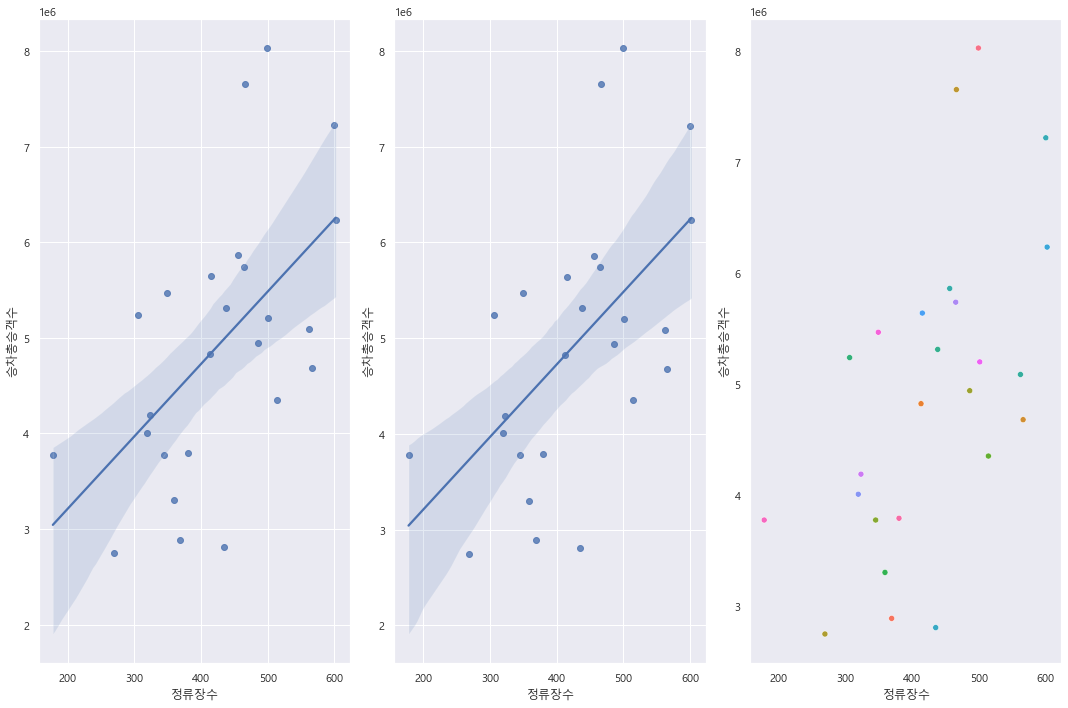

승차총승객수 : (0.5666813370974586, 0.003141977397117319)


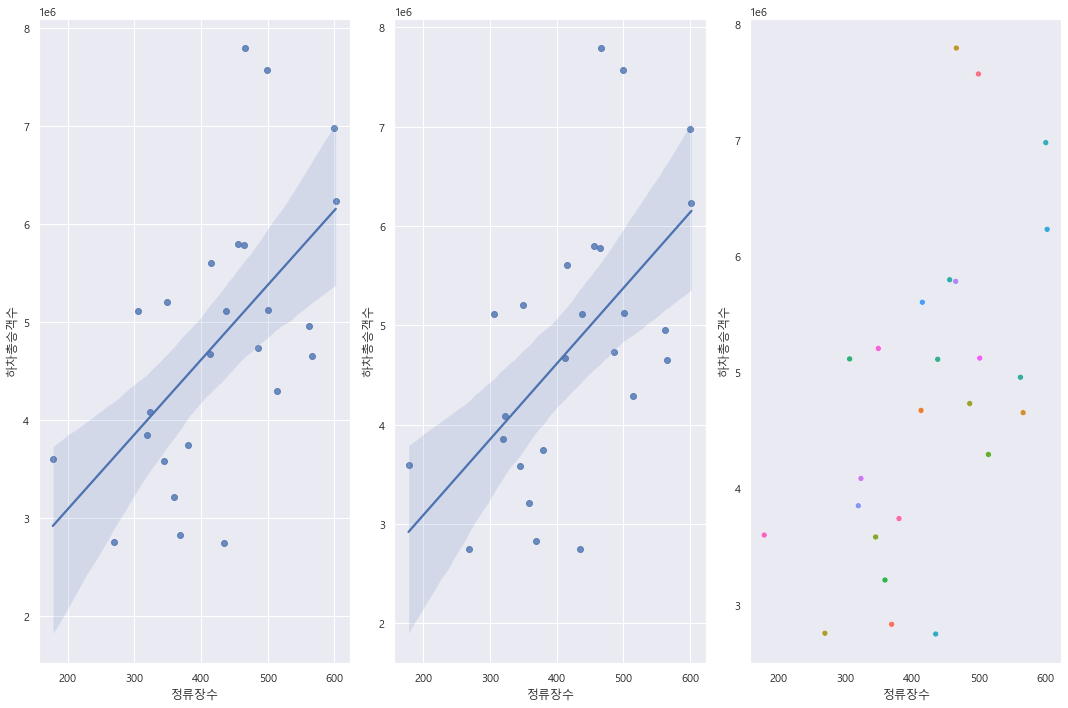

하차총승객수 : (0.5784790149467576, 0.0024518332034538645)


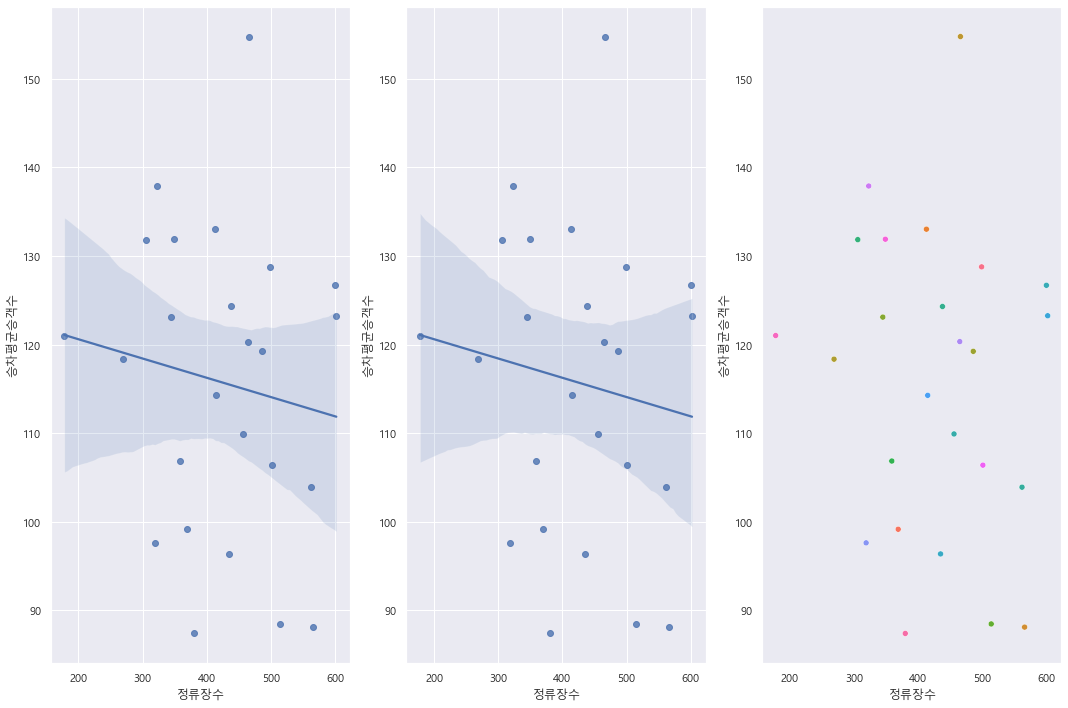

승차평균승객수 : (-0.13531841122802116, 0.5189725687303929)


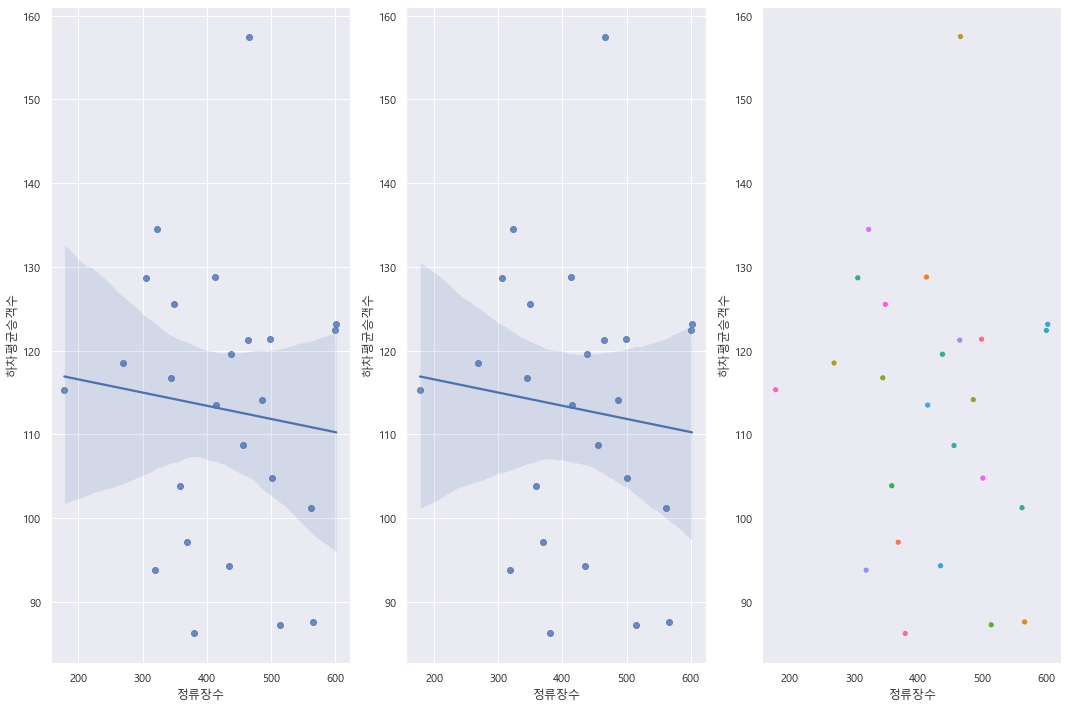

하차평균승객수 : (-0.09914592134749221, 0.637273177989508)


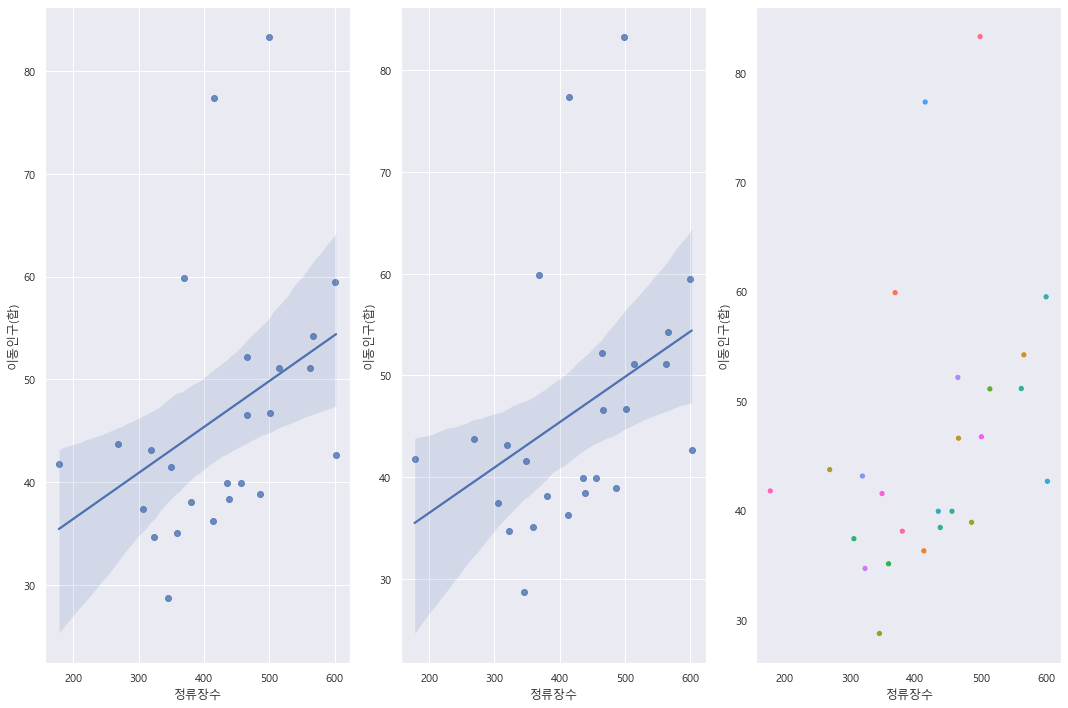

이동인구(합) : (0.3711332281288715, 0.06777105417986702)


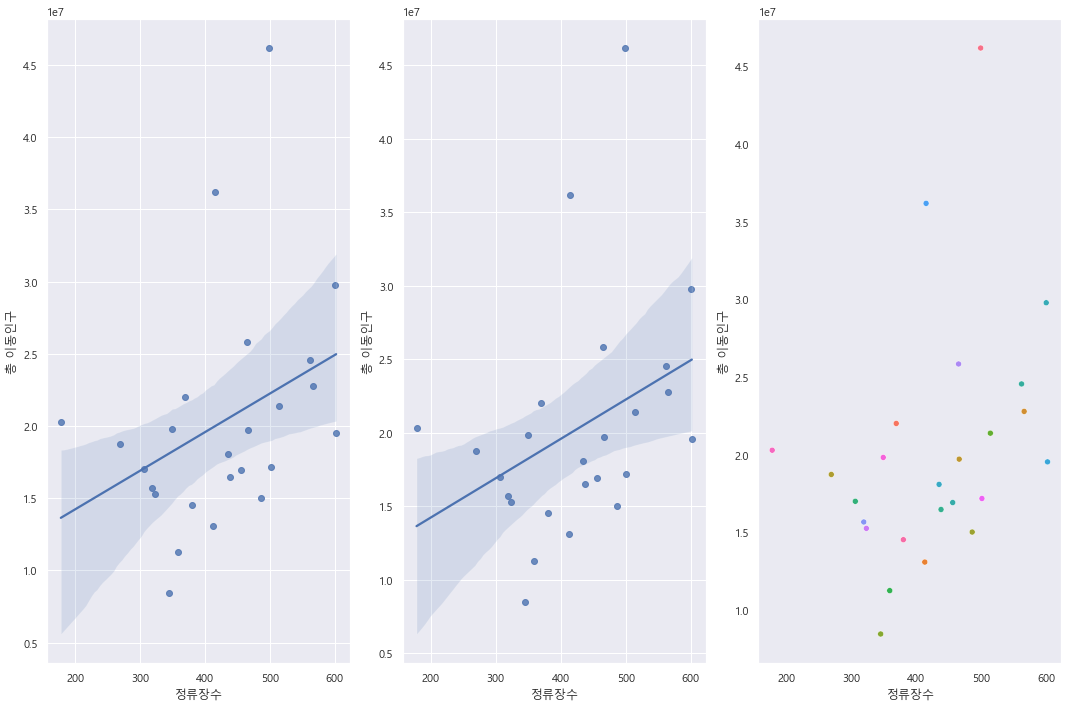

총 이동인구 : (0.3585310360765819, 0.07842047180561913)


In [27]:
# 정류장 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='정류장수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='정류장수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='정류장수', y=i, hue=target, legend=False)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    result = spst.pearsonr(standard['정류장수'], standard[i])
    print(f'{i} : {result}')

* 장류장수 별 이용자
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상으 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.13, 0.09로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.3 정도의 약간의 관계가 있어 보임

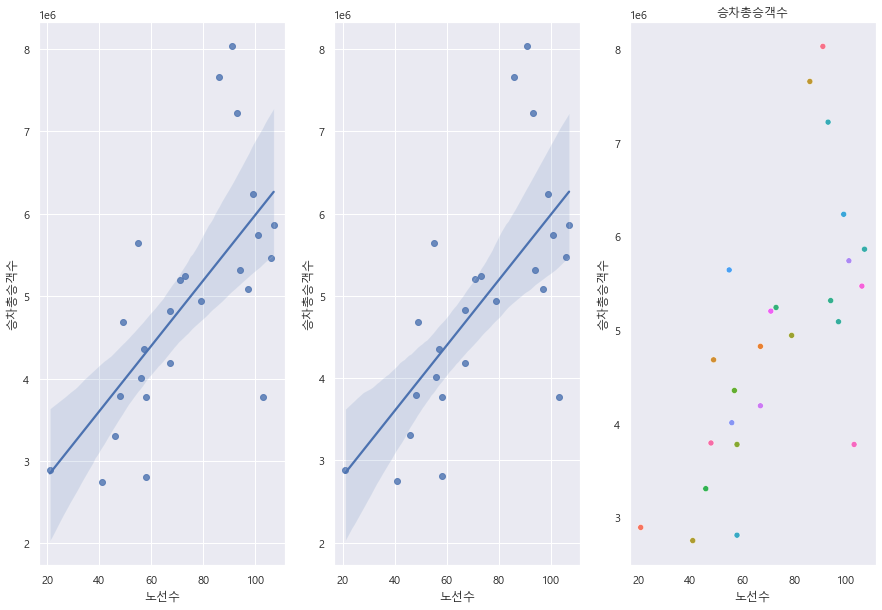

승차총승객수 : (0.6654877832095705, 0.0002830862285771965)


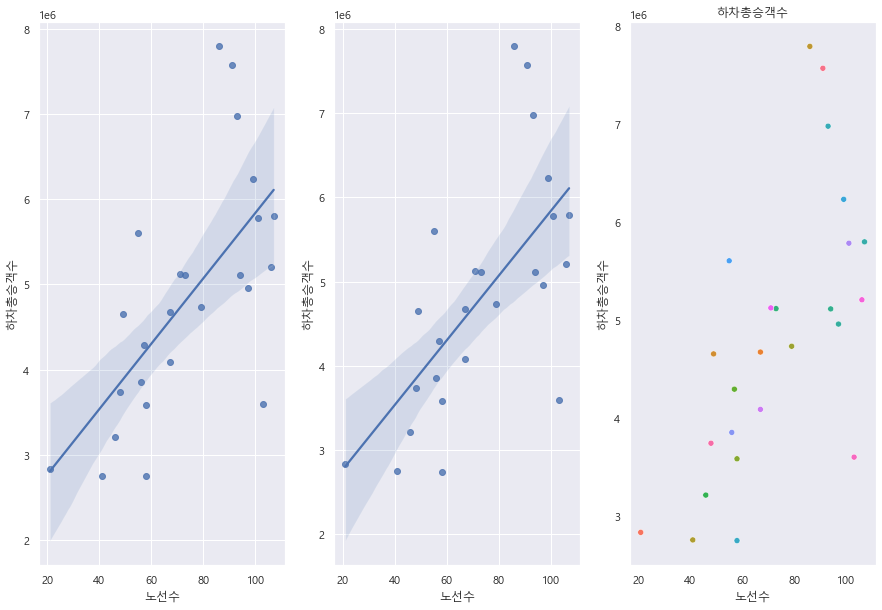

하차총승객수 : (0.6526422720355217, 0.00040610118937178525)


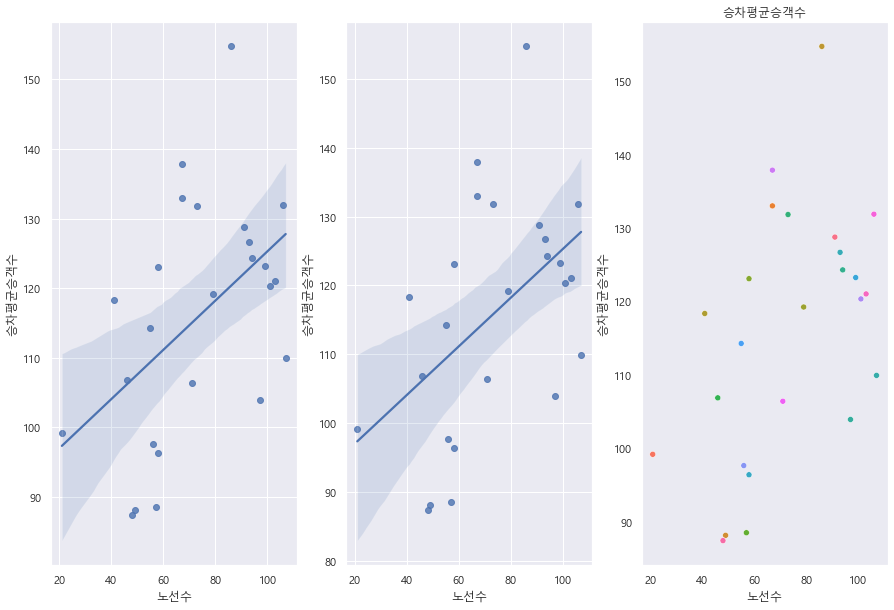

승차평균승객수 : (0.4935407909274122, 0.012170019218131729)


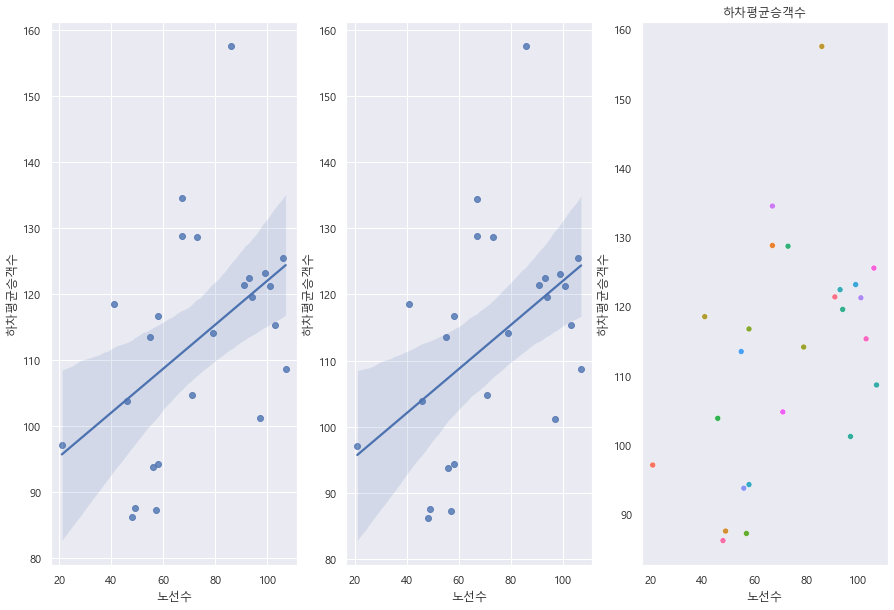

하차평균승객수 : (0.4704401254149345, 0.017632441540646464)


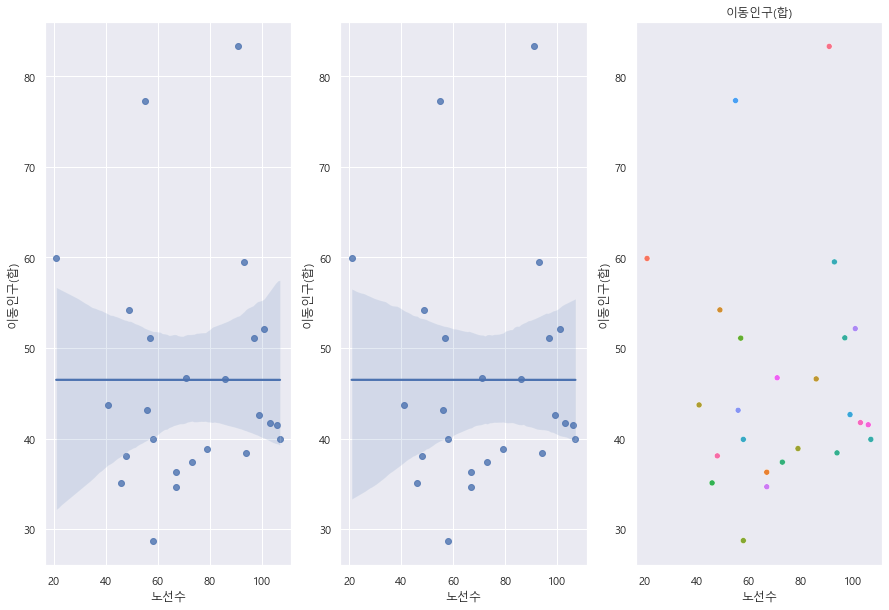

이동인구(합) : (-0.000111318852328849, 0.9995786397407214)


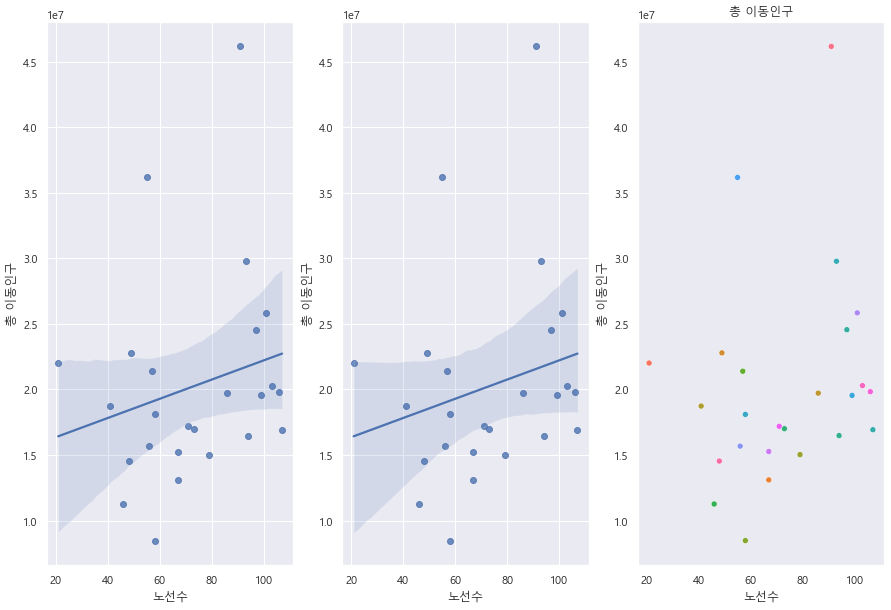

총 이동인구 : (0.22044113587699826, 0.2896579647452525)


In [28]:
# 노선 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='노선수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='노선수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='노선수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    
    result = spst.pearsonr(standard['노선수'], standard[i])
    print(f'{i} : {result}')

* 노선수 별 이용
1. 승/하차총승객수와 관계에서는 상관계수 0.6 이상으 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.4 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.0001로 관계가 없어 보임
4. 총이동인구의 관계에서는 상관계수 0.2 정도의 약간의 관계가 있어 보임

In [24]:
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '이동인구(합)', '총 이동인구']

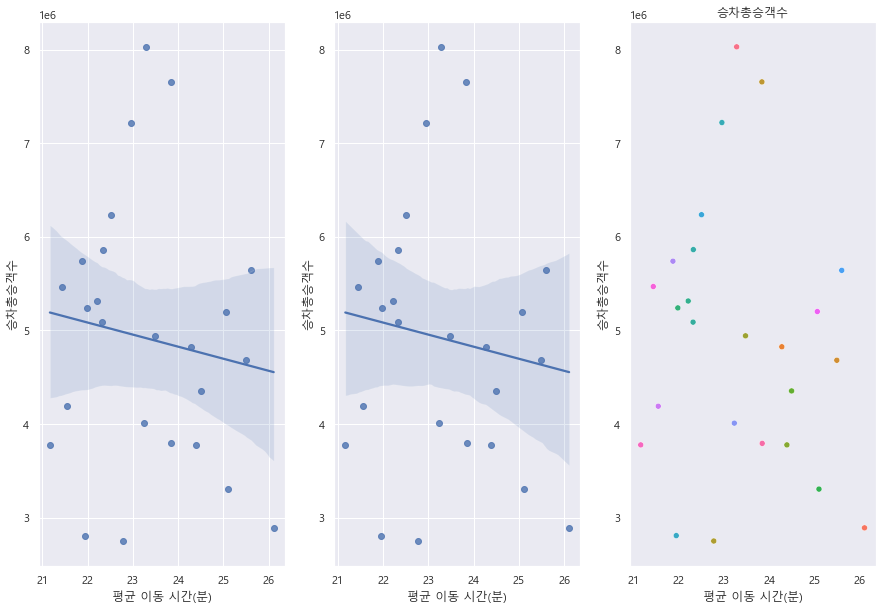

승차총승객수 : (-0.13003622625415018, 0.5355647655353494)


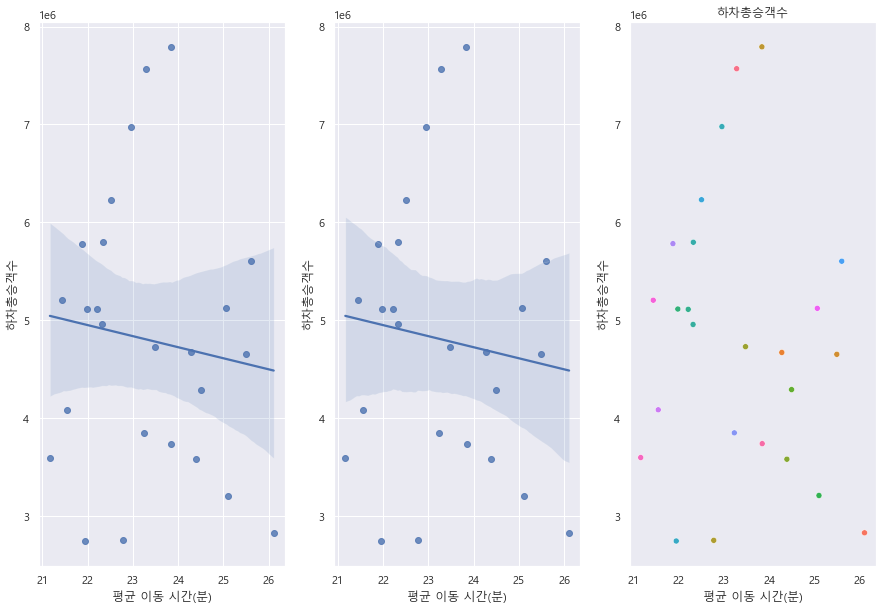

하차총승객수 : (-0.11561132590784617, 0.5821045664261221)


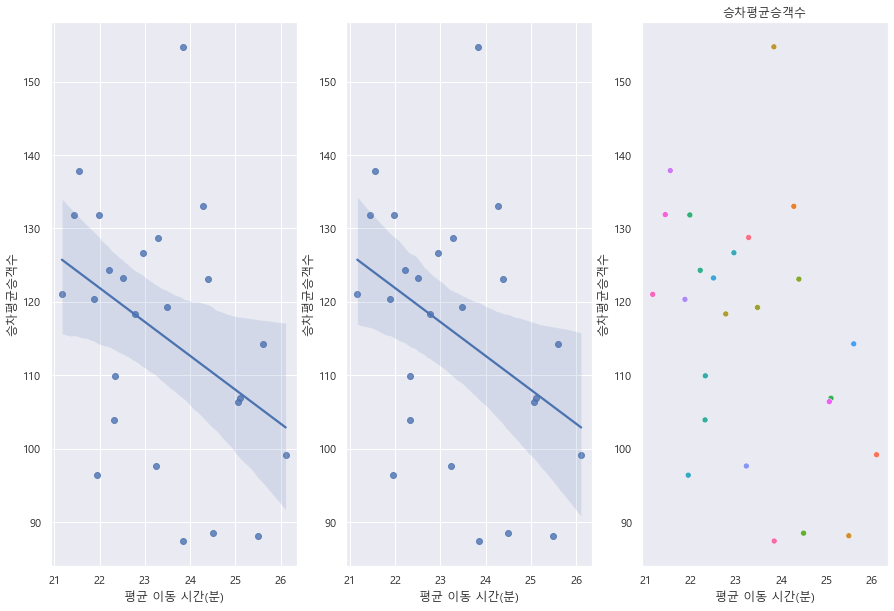

승차평균승객수 : (-0.38819691316854543, 0.05516320629651265)


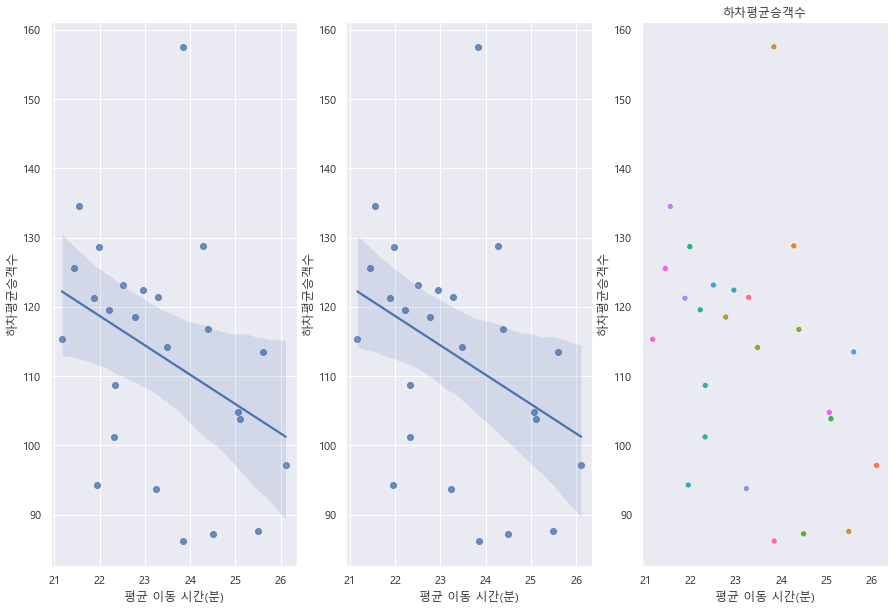

하차평균승객수 : (-0.36049460362359953, 0.07668259838726062)


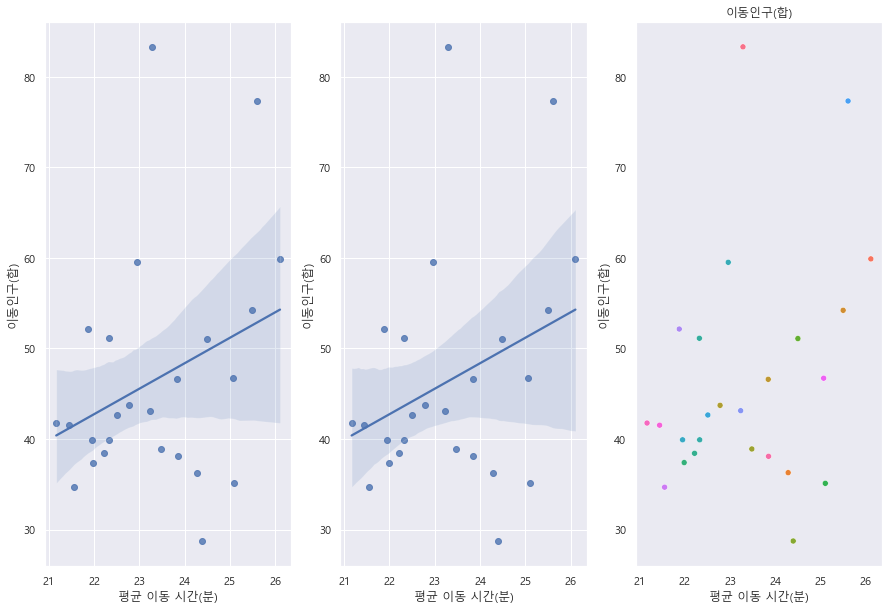

이동인구(합) : (0.31544000540549627, 0.12454494936488411)


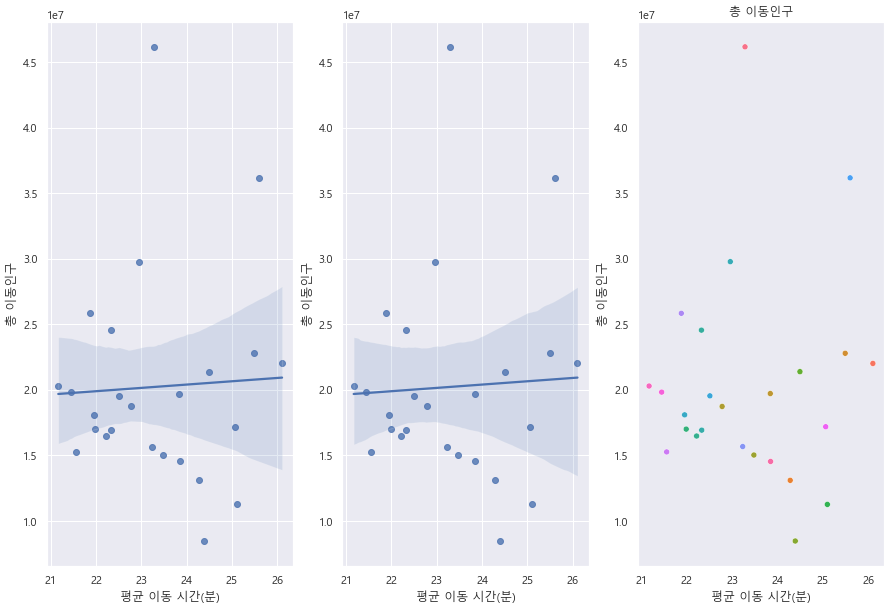

총 이동인구 : (0.045696595345735225, 0.8282874998031786)


In [29]:
# 평균 이동 시간(분) 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='평균 이동 시간(분)', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='평균 이동 시간(분)', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='평균 이동 시간(분)', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(standard['평균 이동 시간(분)'], standard[i])
    print(f'{i} : {result}')

* 평균 이동 시간(분) 별 이용자수
1. 승/하차총승객수와 관계에서는 상관계수 0.1 로 관계가 거의 없어 보임임
2. 승/하차평균승객수와 관계에서는 상관계수 0.3 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.3 정도의 약간의 관계가 있어 보임
4. 총이동인구의 관계에서는 상관계수 0.04로 관계가 없어 보임

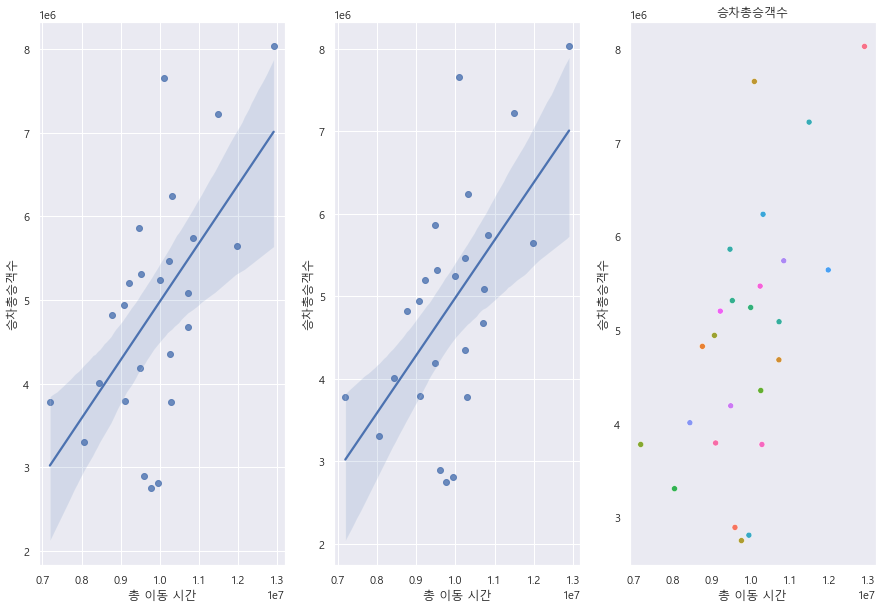

승차총승객수 : (0.5955333451957727, 0.001684620372494398)


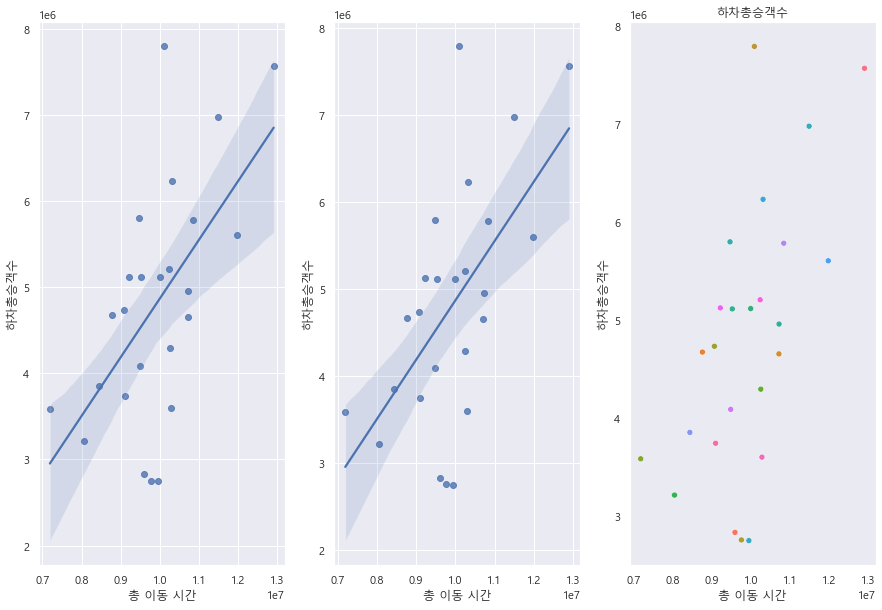

하차총승객수 : (0.5901657349468873, 0.0019000395965845936)


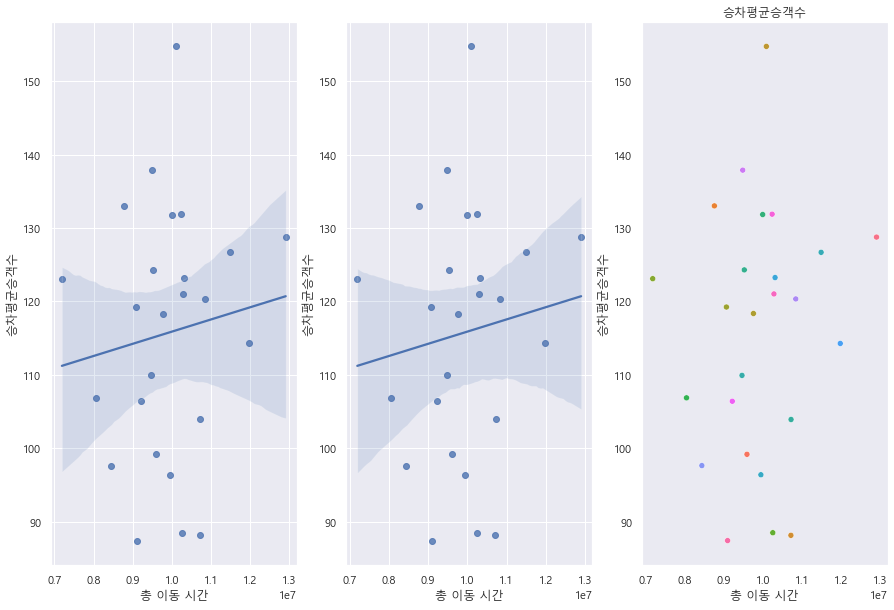

승차평균승객수 : (0.11783974420329976, 0.5748012106288645)


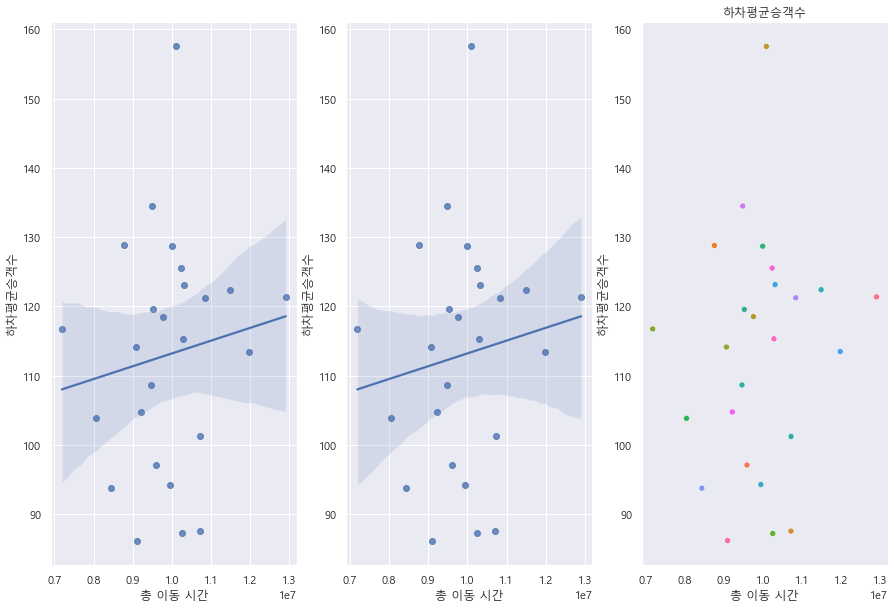

하차평균승객수 : (0.13269097182267528, 0.5271947100597492)


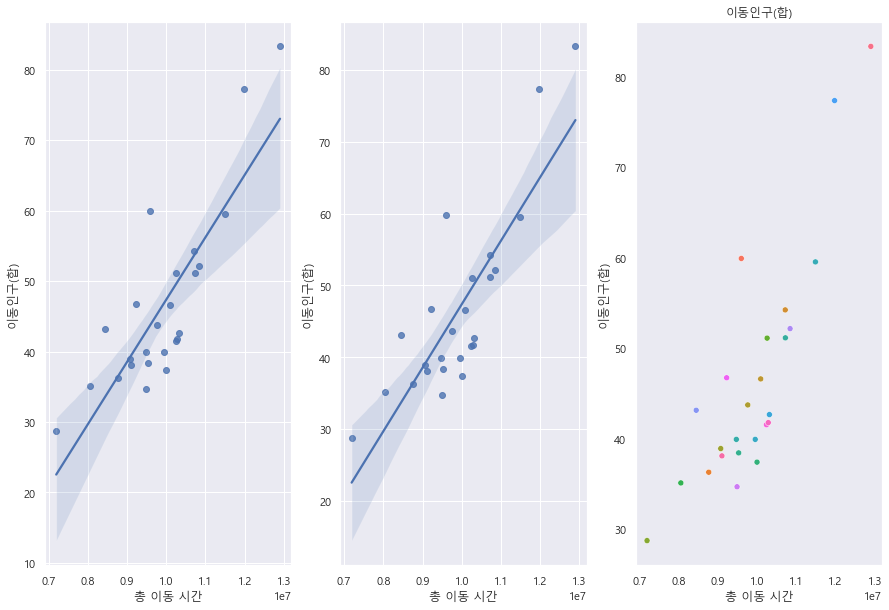

이동인구(합) : (0.8380909585582496, 1.7092649680260089e-07)


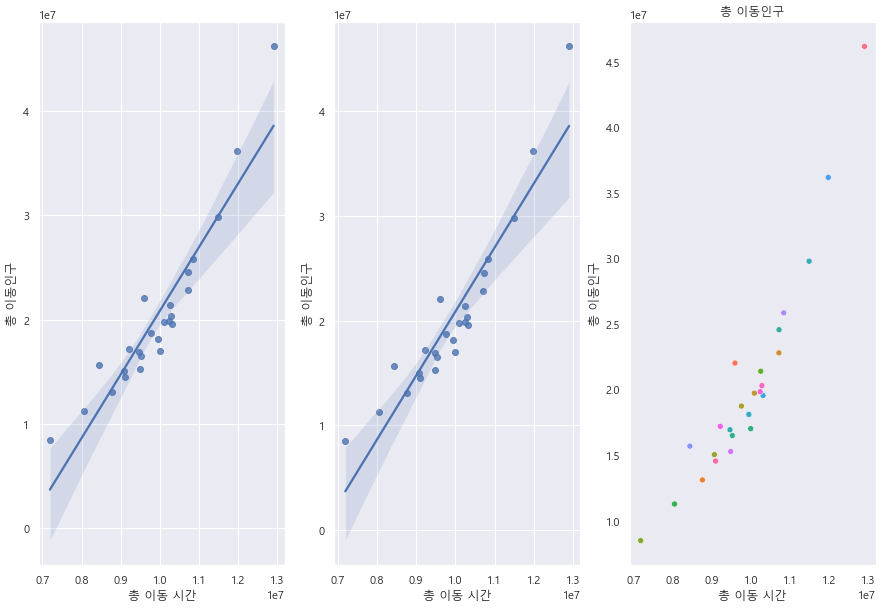

총 이동인구 : (0.934049797227354, 9.095861793625874e-12)


In [30]:
# 총 이동 시간 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='총 이동 시간', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='총 이동 시간', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='총 이동 시간', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(standard['총 이동 시간'], standard[i])
    print(f'{i} : {result}')

* 총 이동 시간 별 이용자수
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상의 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.11로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.8, 0.9 이상의 큰 관계가 있어 보임

In [34]:
standard['승차승객/정류장수'] = standard['승차총승객수'] / standard['정류장수']
standard['하차승객/정류장수'] = standard['하차총승객수'] / standard['정류장수']
standard['이동인구(합)/정류장수'] = standard['이동인구(합)'] / standard['정류장수']
standard['총 이동인구/정류장수'] = standard['총 이동인구'] / standard['정류장수']

standard['승차승객/노선수'] = standard['승차총승객수'] / standard['노선수']
standard['하차승객/노선수'] = standard['하차총승객수'] / standard['노선수']
standard['이동인구(합)/노선수'] = standard['이동인구(합)'] / standard['노선수']
standard['총 이동인구/노선수'] = standard['총 이동인구'] / standard['노선수']

standard[['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수', '승차승객/노선수' , '하차승객/노선수', '이동인구(합)/노선수', '총 이동인구/노선수']].describe()

,승차승객/정류장수,하차승객/정류장수,이동인구(합)/정류장수,총 이동인구/정류장수,승차승객/노선수,하차승객/노선수,이동인구(합)/노선수,총 이동인구/노선수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01
mean,11922.706529,11633.129072,0.114962,49791.071055,71363.061299,69811.839657,0.748330,3.143267e+05
std,3377.156483,3232.972114,0.039127,21331.179426,20555.684617,20471.192599,0.507906,1.964007e+05
min,6453.517241,6314.340230,0.070845,24545.827449,36666.747573,34941.087379,0.372975,1.460054e+05
25%,9980.371053,9734.551440,0.090966,37118.861601,56830.445545,57259.514851,0.495355,1.970196e+05
50%,11683.246973,11311.823245,0.099399,42314.718455,71592.357143,68770.946429,0.541707,2.447850e+05
75%,12972.065015,12712.631579,0.122204,55573.284216,77648.709677,75310.947368,0.793474,3.202278e+05
max,21217.275281,20218.719101,0.234612,114005.738371,137621.571429,134786.000000,2.851876,1.048296e+06


* 자치구별 1 정류장 당 이용자수 : ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']

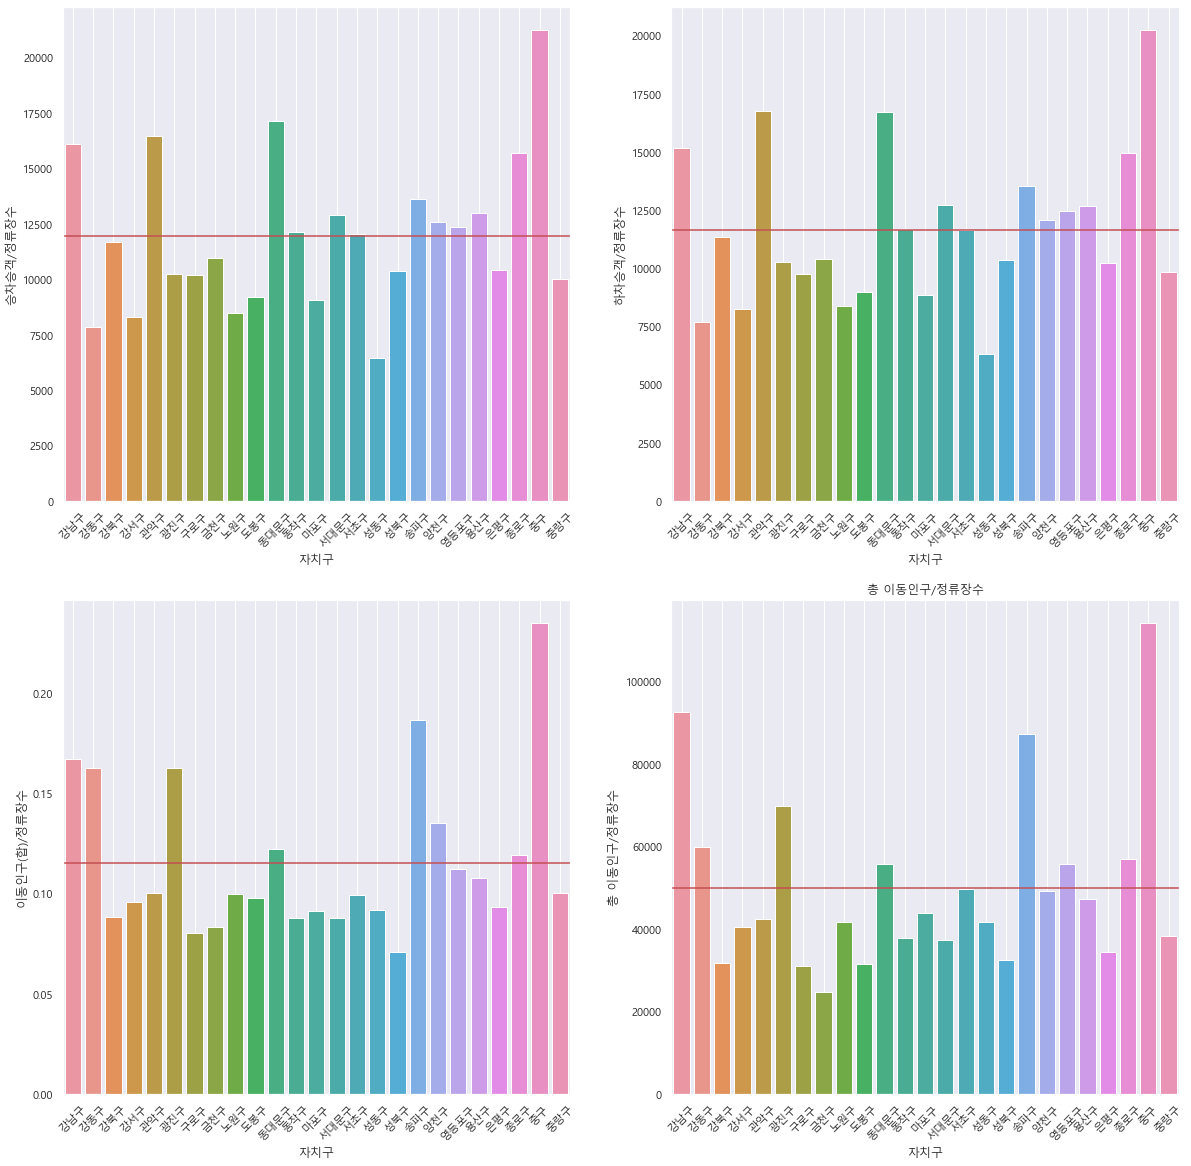

In [48]:
li = ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [50]:
# ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']
tmp1 = standard.loc[(standard['승차승객/정류장수'] > standard['승차승객/정류장수'].mean())
                        & (standard['하차승객/정류장수'] > standard['하차승객/정류장수'].mean())
                        & (standard['이동인구(합)/정류장수'] > standard['이동인구(합)/정류장수'].mean())
                        & (standard['총 이동인구/정류장수'] > standard['총 이동인구/정류장수'].mean())]
tmp1['자치구']

0      강남구
10    동대문구
17     송파구
22     종로구
23      중구
Name: 자치구, dtype: object

* 자치구별 1 노선 당 이용자수 : ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']

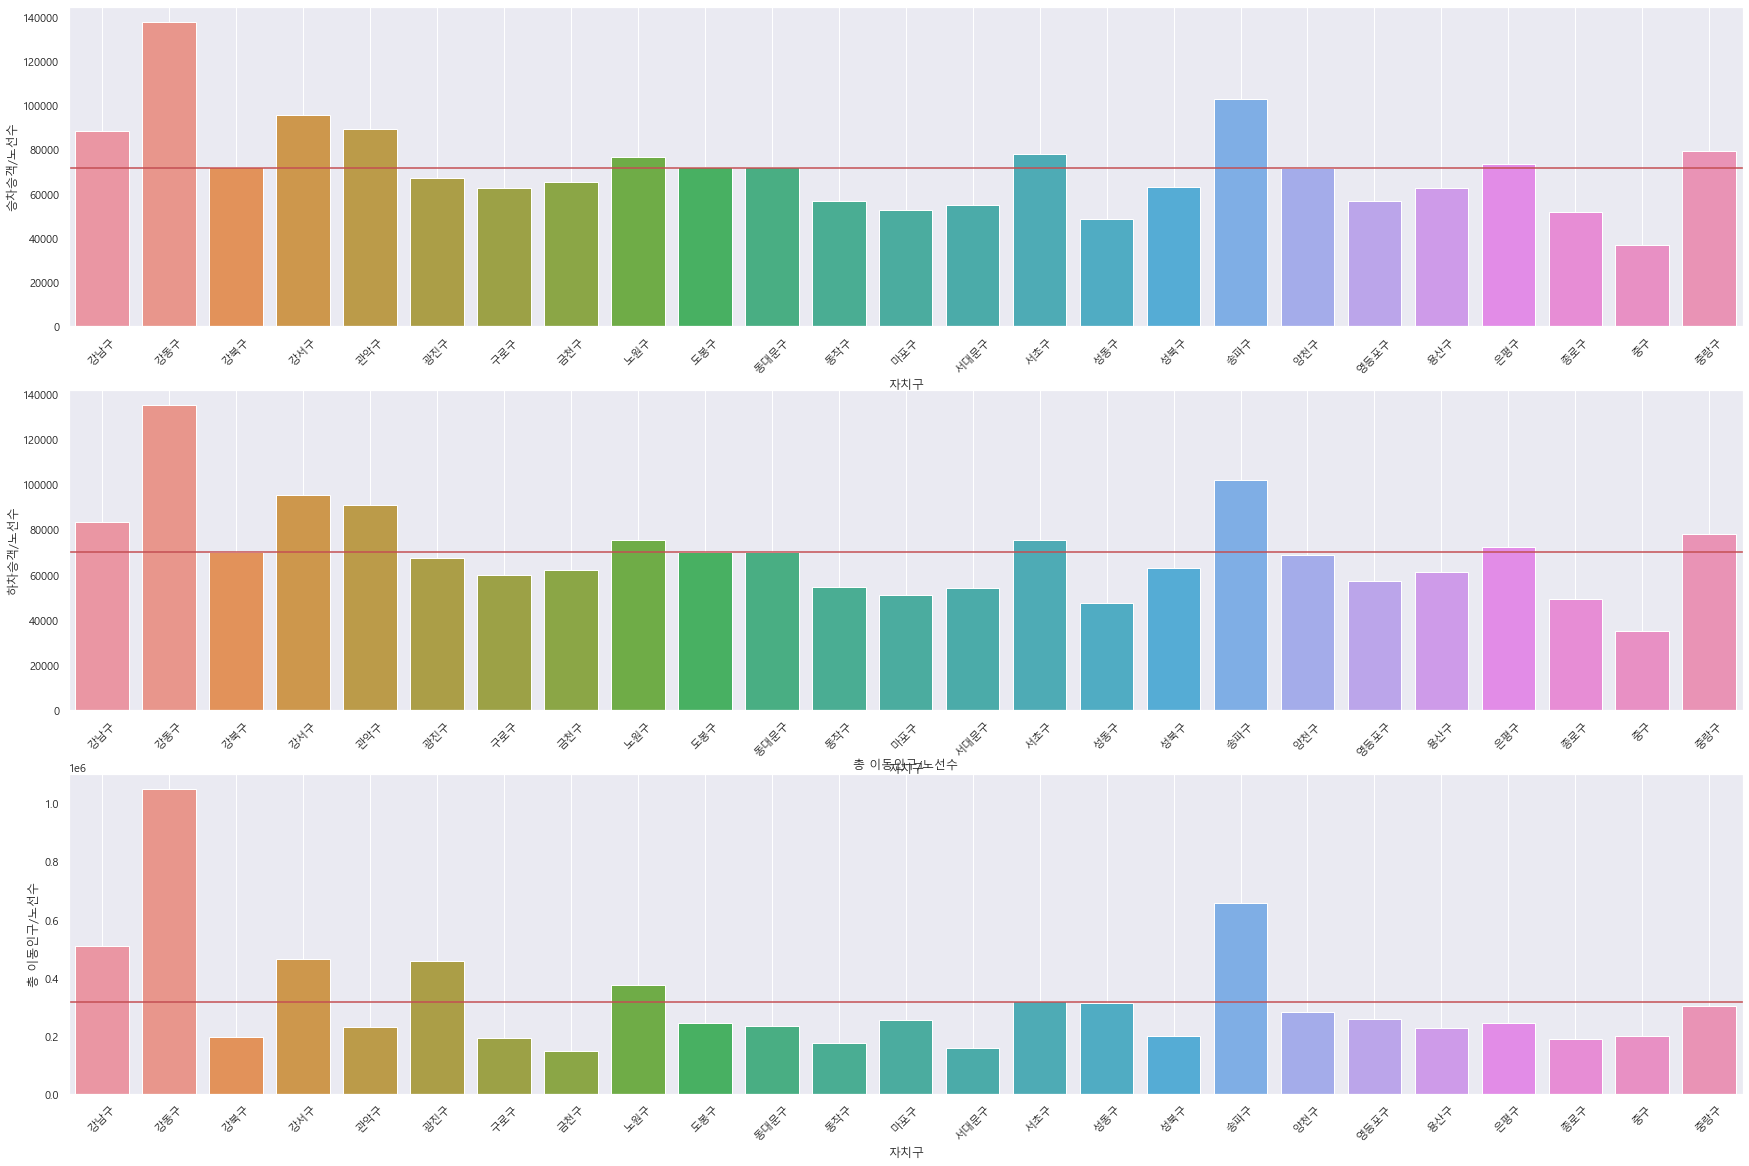

In [53]:
li = ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']
count = 1
plt.figure(figsize=(30,20))
for i in li:
    plt.subplot(3,1,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [55]:
# ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']
tmp2 = standard.loc[(standard['승차승객/노선수'] > standard['승차승객/노선수'].mean())
                        & (standard['하차승객/노선수'] > standard['하차승객/노선수'].mean())
                        & (standard['총 이동인구/노선수'] > standard['총 이동인구/노선수'].mean())]
tmp2['자치구']

0     강남구
1     강동구
3     강서구
8     노원구
14    서초구
17    송파구
Name: 자치구, dtype: object

In [57]:
tmp = standard.loc[(standard['승차승객/정류장수'] > standard['승차승객/정류장수'].mean())
                        & (standard['하차승객/정류장수'] > standard['하차승객/정류장수'].mean())
                        & (standard['이동인구(합)/정류장수'] > standard['이동인구(합)/정류장수'].mean())
                        & (standard['총 이동인구/정류장수'] > standard['총 이동인구/정류장수'].mean())
                        & (standard['승차승객/노선수'] > standard['승차승객/노선수'].mean())
                        & (standard['하차승객/노선수'] > standard['하차승객/노선수'].mean())
                        & (standard['총 이동인구/노선수'] > standard['총 이동인구/노선수'].mean())]

tmp

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,이동인구(합)/정류장수,총 이동인구/정류장수,이동인구(합)/노선수,총 이동인구/노선수
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.284573,83.309306,12904380,46170267.4,16093.152305,15168.763527,88247.065934,83178.164835,0.166953,92525.585972,0.915487,507365.575824
17,송파구,415,55,5641742,5603488,114.270072,113.495260,25.605607,77.326264,11978610,36174154.0,13594.559036,13502.380723,102577.127273,101881.600000,0.186328,87166.636145,1.405932,657711.890909


## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?